In [1]:
#The reviews of a restaurant play a very important role in the food industry. The  quality of the food and 
#place can be measured by review given by customer. A new client can decided whether it buy or not given item 
#based on previously reviews.

#In this project we used sentiment analysis to determined whether the restaurent is recommended or not. 
#We used different machine learning algorithms to get more accurate predictions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('wordnet')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#Reading the dataset
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t',quoting = 3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Data Wrangling


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df["Review"][1]

'Crust is not good.'

Text(0.5, 1.0, 'Target Class')

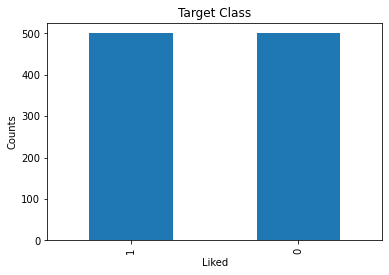

In [6]:
df["Liked"].value_counts().plot(kind='bar')
plt.xlabel("Liked")
plt.ylabel("Counts")
plt.title("Target Class")

### Text Mining

In [7]:
# Changing text to tokens and convertion all of the words to lower case
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

In [8]:
df['Review_clear'] = df['Review'].apply(tokens) #apply allow the us to pass a function and apply it on every single value of the dataframe
df['Review_clear'] = df['Review_clear'].astype(str)

In [9]:

stop_words = nltk.corpus.stopwords.words("english") #extracting the stopwords from nltk library

def stopwords(review): #function to remove stopwords
    text = [word.lower() for word in review.split() if word.lower() not in stop_words]
    return " ".join(text)

df['Review_clear'] = df['Review'].apply(stopwords) # applyng function to dataframe using apply
df.head()

,Review,Liked,Review_clear
0,Wow... Loved this place.,1,wow... loved place.
1,Crust is not good.,0,crust good.
2,Not tasty and the texture was just nasty.,0,tasty texture nasty.
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great prices.


In [10]:
# Removing all numbers
def numbers(text):
    new_text = []
    for word in text.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)

### Normalization

Normalization of words in the corpus by transform all of different forms of the word into one.

In [11]:
lem = WordNetLemmatizer()

def lemma(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [12]:
df['Review_clear'] = df['Review_clear'].apply(lemma)
df.head()

,Review,Liked,Review_clear
0,Wow... Loved this place.,1,wow... loved place.
1,Crust is not good.,0,crust good.
2,Not tasty and the texture was just nasty.,0,tasty texture nasty.
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great prices.


### WordCloud - Repetition of words

Word Clouds for reviews, representing most common words in each target class.

In [13]:
positive = df[df.Liked== 1]
negative = df[df.Liked== 0]
positive.head()

,Review,Liked,Review_clear
0,Wow... Loved this place.,1,wow... loved place.
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great prices.
8,The fries were great too.,1,fry great too.
9,A great touch.,1,great touch.


In [14]:
negative.head()

,Review,Liked,Review_clear
1,Crust is not good.,0,crust good.
2,Not tasty and the texture was just nasty.,0,tasty texture nasty.
5,Now I am getting angry and I want my damn pho.,0,getting angry want damn pho.
6,Honeslty it didn't taste THAT fresh.),0,honeslty taste fresh.)
7,The potatoes were like rubber and you could te...,0,potato like rubber could tell made ahead time ...


In [15]:
positive_words =[]

for review in positive.Review_clear:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)
positive_words[:100]

'wow... loved place. stopped late may bank holiday rick steve recommendation loved it. selection menu'

In [16]:
negative_words = []

for review in negative.Review_clear:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:100]

'crust good. tasty texture nasty. getting angry want damn pho. honeslty taste fresh.) potato like rub'

### Most Common words in Positive Review

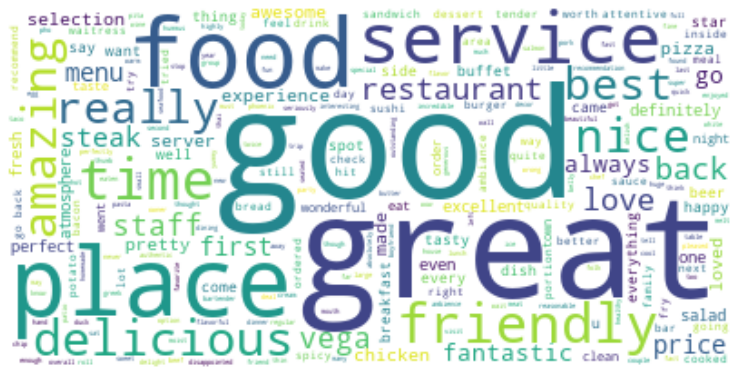

In [17]:
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Most Common words in Negative Review

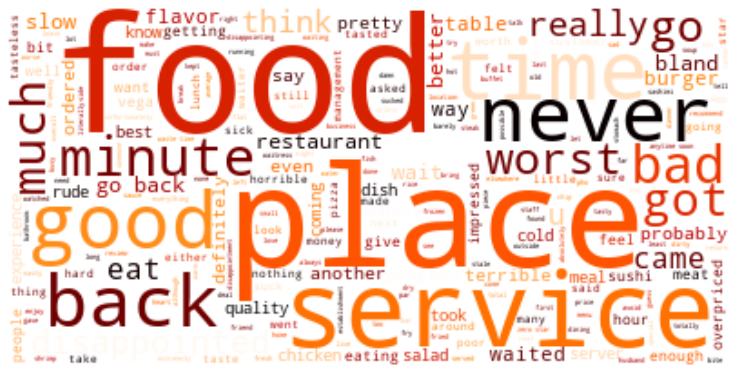

In [18]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
# Calculating Sentiment 
sia = SentimentIntensityAnalyzer()
sentiment = [None]*df.shape[0]
for index, data in df.iterrows():
    sentiment[index] = sia.polarity_scores(data['Review_clear'])['compound']
df.insert(df.shape[1],'sentiment',sentiment)

In [20]:
# Reviws with sentiment
df[["Review" ,"sentiment"]].sort_values(by="sentiment", ascending=False)

,Review,sentiment
537,"Great steak, great sides, great wine, amazing ...",0.9524
585,Great food and great service in a clean and fr...,0.9337
603,"Good value, great food, great service.",0.9260
629,The staff is always super friendly and helpful...,0.9150
55,"Loved it...friendly servers, great food, wonde...",0.9136
...,...,...
495,And then tragedy struck.,-0.7506
336,First - the bathrooms at this location were di...,-0.7633
44,"Frozen pucks of disgust, with some of the wors...",-0.8402
492,"Worse of all, he humiliated his worker right i...",-0.8402


Liked
0   -0.043559
1    0.475031
Name: sentiment, dtype: float64


<AxesSubplot:xlabel='Liked'>

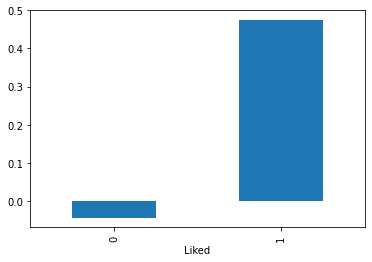

In [32]:
print(df.groupby("Liked") ["sentiment"].mean())
df.groupby("Liked") ["sentiment"].mean().plot(kind="bar")

### Models
We use the following classification models:

Logistic Regression,
Naive Bayes,
Random Forest,
Ada Boosting.

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.


In [21]:
# spliting the data into train and test sets
X = df['Review_clear']
y = df['Liked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [22]:
# creating a numerical feature vector for each document
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

208

In [23]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

ytest = np.array(y_test)
predictions = model.predict(vect.transform(X_test))

print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(ytest, predictions))

accuracy 0.665
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        97
           1       0.72      0.56      0.63       103

    accuracy                           0.67       200
   macro avg       0.68      0.67      0.66       200
weighted avg       0.68      0.67      0.66       200



In [24]:
#Naive Bayes
model_nb = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf',MultinomialNB()),
                   ])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.685
              precision    recall  f1-score   support

           0       0.66      0.71      0.69        97
           1       0.71      0.66      0.68       103

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.69      0.69      0.68       200



In [25]:
#Random Forest
model_rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-rf', RandomForestClassifier(n_estimators=50)),
                    ])

model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)

print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.675
              precision    recall  f1-score   support

           0       0.63      0.78      0.70        97
           1       0.74      0.57      0.64       103

    accuracy                           0.68       200
   macro avg       0.69      0.68      0.67       200
weighted avg       0.69      0.68      0.67       200



In [26]:
#Ada Boosting
ada = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
                ('clf-ada', AdaBoostClassifier()),
                ])

ada.fit(X_train, y_train)
ytest = np.array(y_test)
ada_pred = ada.predict(X_test)

print('accuracy %s' % accuracy_score(ada_pred, y_test))
print(classification_report(ytest, ada_pred))

accuracy 0.68
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        97
           1       0.75      0.56      0.64       103

    accuracy                           0.68       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.70      0.68      0.68       200



### Which one is the best model?

In [27]:
log_acc = accuracy_score(predictions, y_test)
nb_acc = accuracy_score(pred_y, y_test)
rf_acc = accuracy_score(pred, y_test)
ada_acc = accuracy_score(ada_pred, y_test)

In [28]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'AdaBoosting'],
                      'Score': [log_acc, nb_acc, rf_acc, ada_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Naive Bayes,0.685
3,AdaBoosting,0.680
2,Random Forest,0.675
0,Logistic Regression,0.665


### Conclusion
This project was aimed to used sentiment analysis to determine whether to recommend this restaurant based on their reviews. We started with the data wrangling and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training  different Classification models and we got the best accuracy of 0.685 for Naive Bayes method.